In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
import re

In [2]:
df = pd.read_csv(r"C:\Users\USER\Desktop\CodeProjects\BestSellersAmazon\data\Amazon_bestsellers_items_2025.csv")


In [3]:
print("Dataset Overview:")
print(df.shape) 
print("\nColumns:")
print(df.columns.tolist()) 
print("\nData Types:")
print(df.dtypes)           
print("\nMissing Values:")
print(df.isnull().sum())   

Dataset Overview:
(999, 12)

Columns:
['Unnamed: 0', 'rank', 'asin', 'product_title', 'product_price', 'product_star_rating', 'product_num_ratings', 'product_url', 'product_photo', 'rank_change_label', 'country', 'page']

Data Types:
Unnamed: 0               int64
rank                     int64
asin                    object
product_title           object
product_price           object
product_star_rating    float64
product_num_ratings    float64
product_url             object
product_photo           object
rank_change_label      float64
country                 object
page                     int64
dtype: object

Missing Values:
Unnamed: 0               0
rank                     0
asin                     0
product_title            0
product_price           54
product_star_rating     30
product_num_ratings     30
product_url              0
product_photo            0
rank_change_label      999
country                  0
page                     0
dtype: int64


In [4]:
print("\nFirst 5 rows:")
print(df.head())           
print("\nBasic Statistics:")
print(df.describe())    


First 5 rows:
   Unnamed: 0  rank        asin  \
0           0     1  B073VKKNN9   
1           1     2  B07PQZJ6Y8   
2           2     3  B0D1KL34JM   
3           3     4  B07B9YYLGG   
4           4     5  B073VLGMZ4   

                                       product_title product_price  \
0  Kaspersky | Premium - Total Security (Ultimate...       ₹469.00   
1  K7 Security K7, Total Security, 1 User, 1 Year...       ₹370.00   
2  Microsoft Office 2021 Professional - Lifetime ...     ₹1,799.00   
3  Bitdefender - 1 Device,1 Year - Mobile Securit...        ₹94.00   
4  McAfee Total Protection 2025 | 1 Device, 3 Yea...     ₹1,699.00   

   product_star_rating  product_num_ratings  \
0                  4.3              13324.0   
1                  4.4               2291.0   
2                  4.5                388.0   
3                  4.1               9630.0   
4                  4.4               5783.0   

                           product_url  \
0  https://www.amazon.in/dp/


Products by Country:
country
IN    100
CA    100
IT    100
AU    100
DE    100
FR    100
JP    100
ES    100
MX    100
US     99
Name: count, dtype: int64


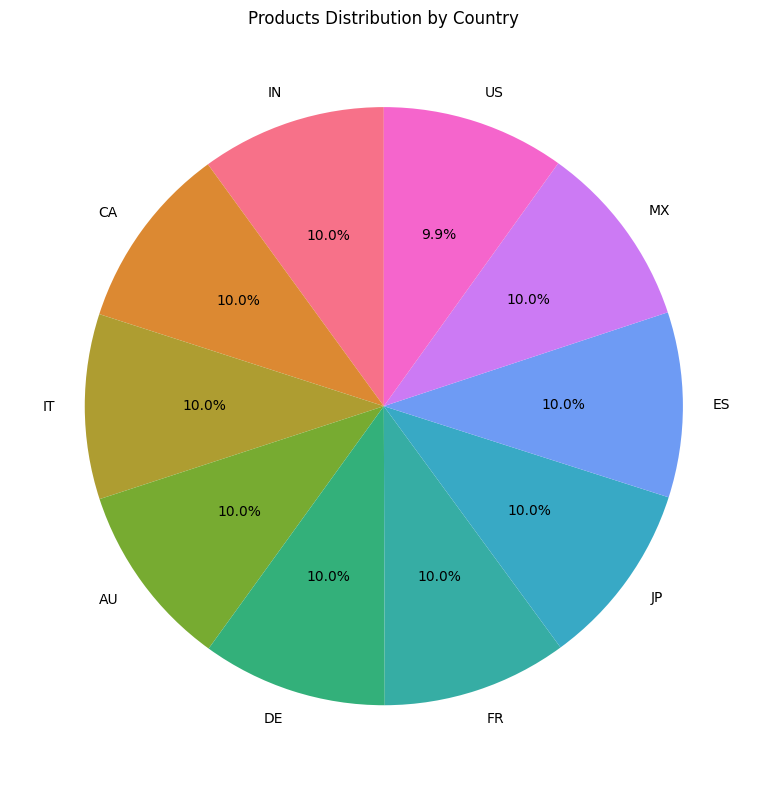

In [5]:
print("\nProducts by Country:")
country_counts = df['country'].value_counts()
print(country_counts)

import matplotlib.pyplot as plt
import seaborn as sns

# יצירת גרף Pie בלבד
plt.figure(figsize=(8,8))
plt.pie(
    country_counts.values,
    labels=country_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette("husl", len(country_counts))
)
plt.title("Products Distribution by Country")
plt.tight_layout()
plt.show()


In [6]:
import re
import numpy as np
import pandas as pd

def clean_price(price_str):
    if pd.isna(price_str):
        return np.nan

    price_str = str(price_str).replace('₹', '').replace('€', '').replace('$', '').replace(',', '')

    match = re.search(r'(\d+\.?\d*)', price_str)
    if match:
        return float(match.group(1))
    return np.nan

# צור את העמודה
df['clean_price'] = df['product_price'].apply(clean_price)


count      945.000000
mean      3666.134667
std       6222.153014
min          2.990000
25%        155.880000
50%       1799.000000
75%       3999.000000
max      78192.000000
Name: clean_price, dtype: float64


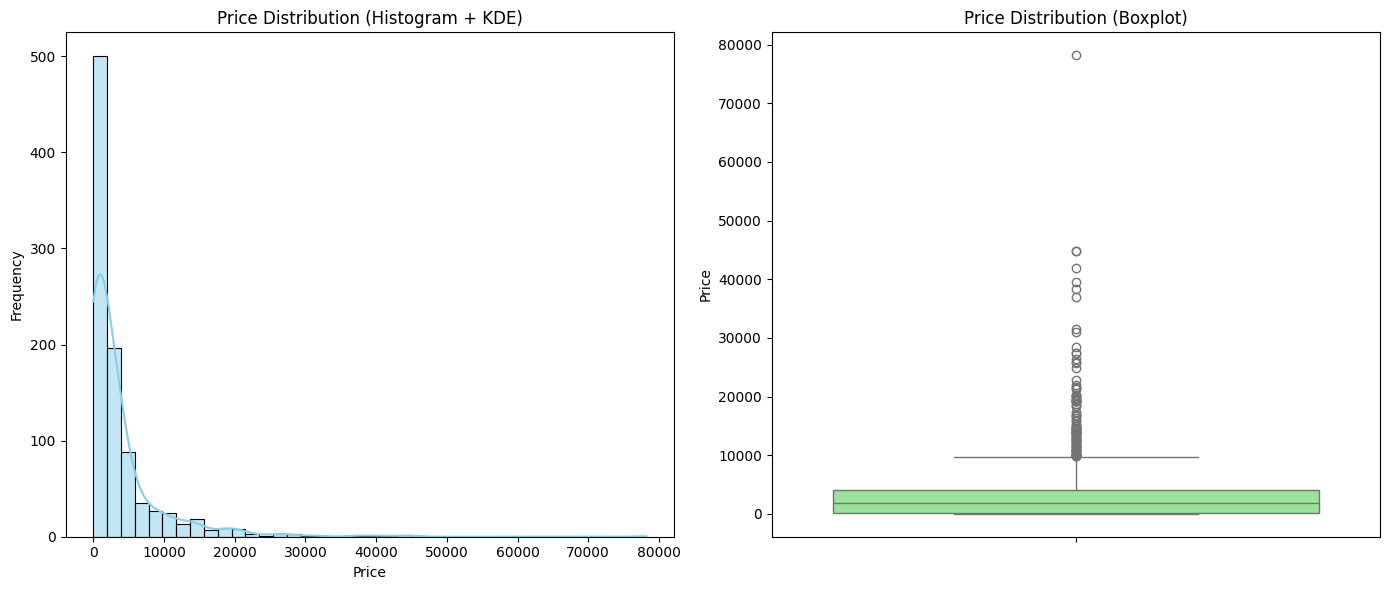

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# בדיקת עמודת המחירים
print(df['clean_price'].describe())

# יצירת גרפים
fig, axes = plt.subplots(1, 2, figsize=(14,6))

# 🔹 Histogram + KDE
sns.histplot(
    df['clean_price'].dropna(),
    bins=40,
    kde=True,
    color="skyblue",
    ax=axes[0]
)
axes[0].set_title("Price Distribution (Histogram + KDE)")
axes[0].set_xlabel("Price")
axes[0].set_ylabel("Frequency")

# 🔹 Boxplot
sns.boxplot(
    y=df['clean_price'].dropna(),
    color="lightgreen",
    ax=axes[1]
)
axes[1].set_title("Price Distribution (Boxplot)")
axes[1].set_ylabel("Price")

plt.tight_layout()
plt.show()


                 mean    median      min       max
country                                           
AU         123.878590    74.975     6.99    897.49
CA          87.433939    40.000    11.69    799.00
DE        3995.459184  2955.500   795.00  36890.00
ES        5387.835052  3999.000   506.00  19599.00
FR        4783.770000  3062.000   271.00  41999.00
IN        1367.150000   749.500    94.00  10000.00
IT        6165.793814  3999.000  1099.00  44799.00
JP       11751.474227  8585.000    91.00  78192.00
MX        2081.660964  1425.650   237.02  12739.00
US          64.155312    43.490     2.99    374.99


C:\Users\USER\AppData\Local\Temp\ipykernel_5168\3272445792.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\USER\AppData\Local\Temp\ipykernel_5168\3272445792.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\USER\AppData\Local\Temp\ipykernel_5168\3272445792.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\USER\AppData\Local\Temp\ipykernel_5168\3272445792.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and 

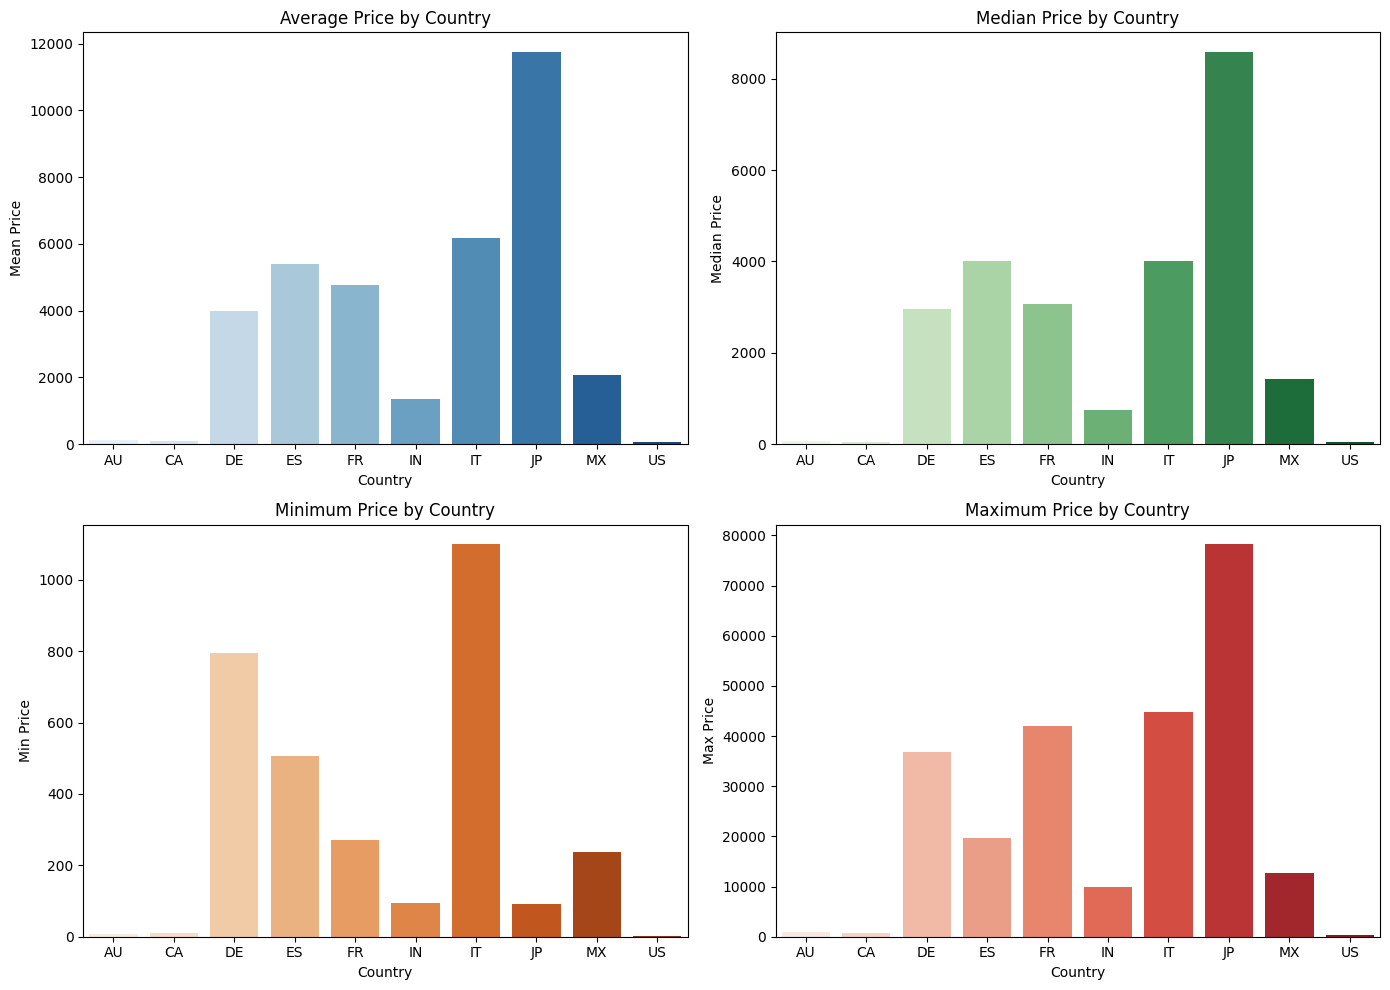

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# חישוב סטטיסטיקות
price_stats = df.groupby('country')['clean_price'].agg(['mean', 'median', 'min', 'max'])
print(price_stats)

# יצירת גרפים
fig, axes = plt.subplots(2, 2, figsize=(14,10))

# 🔹 Mean
sns.barplot(
    x=price_stats.index,
    y=price_stats['mean'],
    palette="Blues",
    ax=axes[0,0]
)
axes[0,0].set_title("Average Price by Country")
axes[0,0].set_xlabel("Country")
axes[0,0].set_ylabel("Mean Price")

# 🔹 Median
sns.barplot(
    x=price_stats.index,
    y=price_stats['median'],
    palette="Greens",
    ax=axes[0,1]
)
axes[0,1].set_title("Median Price by Country")
axes[0,1].set_xlabel("Country")
axes[0,1].set_ylabel("Median Price")

# 🔹 Min
sns.barplot(
    x=price_stats.index,
    y=price_stats['min'],
    palette="Oranges",
    ax=axes[1,0]
)
axes[1,0].set_title("Minimum Price by Country")
axes[1,0].set_xlabel("Country")
axes[1,0].set_ylabel("Min Price")

# 🔹 Max
sns.barplot(
    x=price_stats.index,
    y=price_stats['max'],
    palette="Reds",
    ax=axes[1,1]
)
axes[1,1].set_title("Maximum Price by Country")
axes[1,1].set_xlabel("Country")
axes[1,1].set_ylabel("Max Price")

plt.tight_layout()
plt.show()


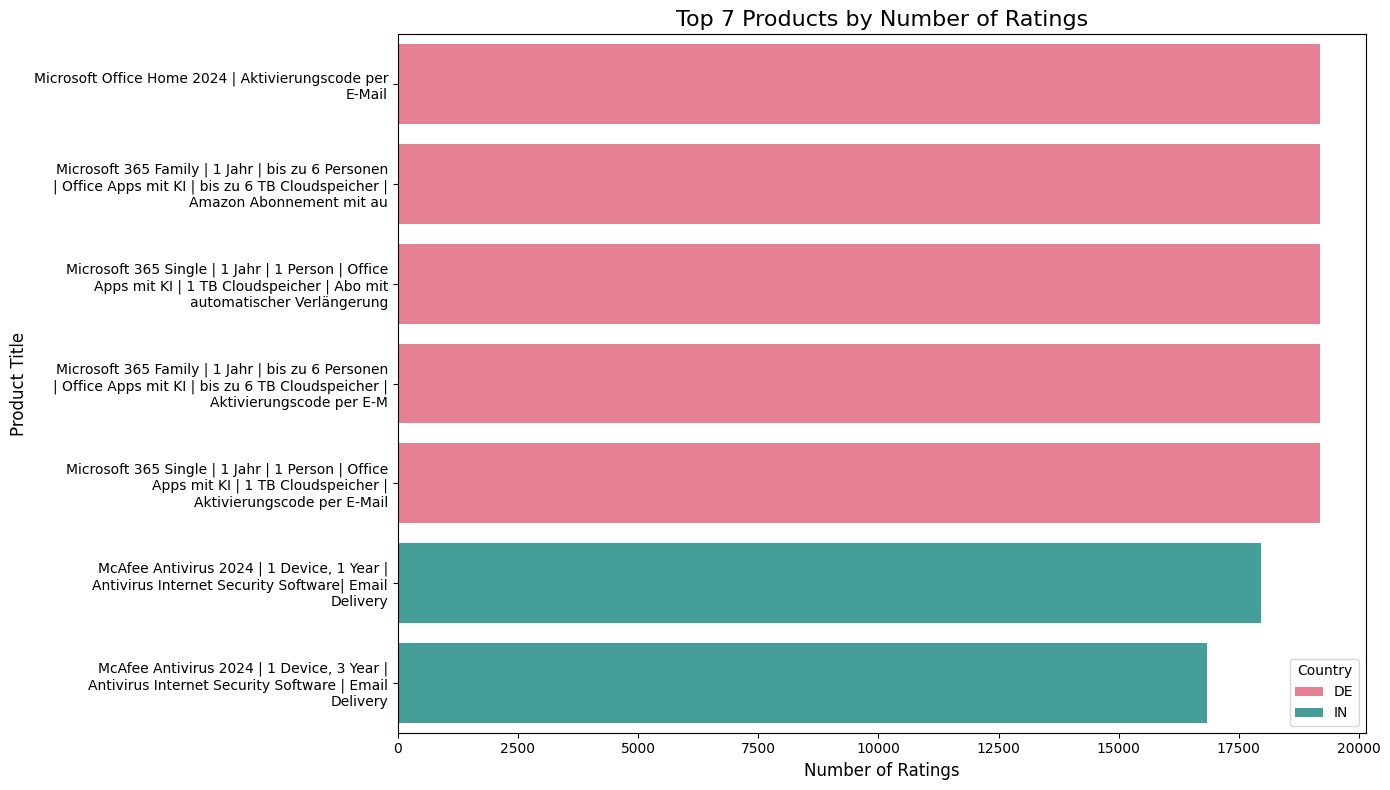

In [9]:
import textwrap
import matplotlib.pyplot as plt
import seaborn as sns

top_products = (
    df.nlargest(7, 'product_num_ratings')[['product_title', 'product_num_ratings', 'product_star_rating', 'country']]
)

top_products['product_title_wrapped'] = top_products['product_title'].apply(
    lambda x: "\n".join(textwrap.wrap(x, 50))
)

plt.figure(figsize=(14,8))
sns.barplot(
    data=top_products,
    x='product_num_ratings',
    y='product_title_wrapped',
    hue='country',
    dodge=False,
    palette="husl"
)

plt.title("Top 7 Products by Number of Ratings", fontsize=16)
plt.xlabel("Number of Ratings", fontsize=12)
plt.ylabel("Product Title", fontsize=12)
plt.legend(title="Country")
plt.tight_layout()
plt.show()


In [10]:
def extract_brand_hybrid(title):
    brand_aliases = {
    "Microsoft": ["microsoft", "windows", "win", "ms", "mso", "server", "pc", "virtual"],
    "Adobe": ["adobe", "acrobat", "creative cloud", "photoshop"],
    "Apple": ["apple"],
    "Norton": ["norton", "ノートンライフロック"],
    "Kaspersky": ["kaspersky"],
    "McAfee": ["mcafee", "【公式】マカフィー"],
    "Bitdefender": ["bitdefender"],
    "ESET": ["eset", "nod32"],
    "Quick Heal": ["quick heal"],
    "K7": ["k7"],
    "AVG": ["avg"],
    "Webroot": ["webroot"],
    "Malwarebytes": ["malwarebytes"],
    "NordVPN": ["nordvpn", "nordpass"],
    "Mullvad": ["mullvad"],
    "Corel": ["corel"],
    "Nero": ["nero"],
    "Laplink": ["laplink", "pcmover", "pc mover"],
    "TurboTax": ["turbotax"],
    "WISO": ["wiso"],
    "Avast": ["avast"],
    "Net Protector": ["net protector", "npav"],
    "Guardian": ["guardian"],
    "Techlocker": ["techlocker", "tech-shop-pro"],
    "CCleaner": ["ccleaner"],
    "eScan": ["escan"],
    "Autodesk": ["autocad"],
    "Wyze": ["wyze"],
    "H&R Block": ["h&r block"],
    "Quicken": ["quicken"],
    "Roxio": ["roxio"],
    "TrulyOffice": ["trulyoffice"],
    "Synology": ["synology"],
    "Intuit QuickBooks": ["qbdt", "quickbooks", "quick books", "quickbooks desktop"],
    "Ralix": ["ralix"],
    "Hallmark": ["hallmark"],
    "G DATA": ["g data"],
    "Panda": ["panda", "panda dome"],
    "Sourcenext": ["ソースネクスト", "sourcenext", "hd革命", "copydrive", "zero ウイルスセキュリティ", "zero"],
    "AHS": ["ahs", "synthesizer v"],
    "Arturia": ["arturia"],
    "Roland": ["roland"],
    "Individual Software": ["individual software"],
    "BeckerCAD": ["beckercad"],
    "JustSystems": ["一太郎", "ichitaro"],
    "Jungle": ["ジャングル", "jungle"],
    "OfficeSuite": ["officesuite", "openoffice", "open office"],
    "Image-Line": ["fl studio", "audio deluxe", "audiodeluxe"],
    "Yayoi": ["弥生", "yayoi", "やよい"],
    "Hatsune Miku": ["初音ミク", "hatsune miku"],
    "Kingsoft": ["wps office", "kingsoft", "キングソフト"],
    "Movavi": ["movavi"],
    "iFIT": ["ifit"],
    "Shure": ["shure"],
    "Lidl Steuer": ["lidl steuer"],
    "Surfshark": ["surfshark", "surfshark one"],
    "CLIP Studio": ["clip studio", "clipstudio", "clip studio paint", "tabmate", "celsys"],
    "MAGIX": ["magix"],
    "Evercade": ["evercade"],
    "Lapin Malin": ["lapin malin"],
    "ClearClick": ["clearclick"],
    "Trend Micro": ["trend micro", "maximum security", "ウイルスバスター"],
    "Antidote": ["antidote"],
    "Audio-Technica": ["audio-technica", "audiotechnica"],
    "Yamaha": ["yamaha"],
    "DocuWorks": ["docuworks"],
    "SteuerSparErklärung": ["steuersparerklärung", "steuer spar erklärung"],
    "Intel": ["intel"],
    "Readiris": ["readiris"],
    "VIDBOX": ["vidbox"],
    "HackyPi": ["hackypi"],
    "Behringer": ["behringer"],
    "VMware": ["vmware"],
    "Audials": ["audials"],
    "Moho": ["moho"],
    "Kenwood": ["kenwood"],
    "Avira": ["avira"],
    "ARC Studio": ["arc studio"],
    "Tascam": ["tascam"],
    "Pinnacle Studio": ["pinnacle studio"],
    "Linux Mint": ["linux mint"],
    "QuickSteuer": ["quicksteuer", "quick steuer"],
    "Square Enix": ["square enix", "ドラゴンクエスト", "dragon quest", "final fantasy"],
    "Spectrasonics": ["spectrasonics", "omnisphere"],
    "CyberLink": ["cyberlink", "powerdvd"],
    "Fudegrume": ["筆ぐるめ", "fudegrume"],
    "EA": ["ea", "electronic arts", "need for speed", "nfs"],
    "BRIDGE Expert": ["bridge expert", "bridge"],
    "Tax Software": ["tax", "taxman"],
    "Video Tools": ["video", "videokassetten"],
    "Type-Moon": ["fate/grand", "fate grand order"],
    "Kadokawa": ["ロード・エルメロイ", "東方錦上京"],
    "Games": ["stubbs", "slay", "maverick", "anno", "lemon", "tetris", "truth", "retro", "let", "jack"],
    "ALDI": ["aldi"],
    "Adibou": ["adibou"],
    "F-Secure": ["f-secure", "fsecure"],
    "Key": ["key", "key studio", "key アニメ"],
    "AOS Data": ["aosデータ", "aos data"],
    "IBM": ["ibm"],
    "TP-Link": ["tp-link", "tplink"],
    "Audio Gear": ["pedal", "mezclador", "efecto", "oumij", "vikye", "elsky"],
    "Entertainment": ["hollow", "miller's", "the", "one"],
}


    if not isinstance(title, str):
        return "Other"

    t = title.lower()
    for brand, aliases in brand_aliases.items():
        for alias in aliases:
            if alias in t:
                return brand
    return "Other"


df['brand'] = df['product_title'].apply(extract_brand_hybrid)

brand_counts = df['brand'].value_counts()
print("\nTop Brands by Number of Products:")
print(brand_counts.head(25))



Top Brands by Number of Products:
brand
Microsoft        521
Kaspersky         72
McAfee            69
Norton            68
NordVPN           58
EA                12
Adobe             12
Quick Heal        11
Games             10
ESET               8
Other              8
K7                 6
Entertainment      6
Nero               6
Audio Gear         6
Corel              6
Mullvad            6
Sourcenext         5
Avast              5
Bitdefender        4
AVG                4
Panda              4
Tax Software       3
CLIP Studio        3
Kadokawa           3
Name: count, dtype: int64


In [11]:
# חישוב כמות מוצרים + רייטינג ממוצע
brand_stats = (
    df.groupby('brand')
    .agg(
        products=('product_title', 'count'),
        avg_rating=('product_star_rating', 'mean')
    )
    .sort_values('products', ascending=False)
)

print("\nTop Brands with Product Count and Average Rating:")
print(brand_stats.head(25))



Top Brands with Product Count and Average Rating:
               products  avg_rating
brand                              
Microsoft           521    4.089279
Kaspersky            72    4.509722
McAfee               69    4.178261
Norton               68    4.070149
NordVPN              58    4.153448
Adobe                12    3.612500
EA                   12    4.337500
Quick Heal           11    4.300000
Games                10    4.422222
Other                 8    4.360000
ESET                  8    4.200000
Corel                 6    4.016667
Nero                  6    3.666667
Entertainment         6    4.666667
Mullvad               6    4.733333
K7                    6    4.250000
Audio Gear            6    4.333333
Sourcenext            5    4.100000
Avast                 5    4.040000
AVG                   4    3.775000
Panda                 4    4.275000
Bitdefender           4    4.200000
Kadokawa              3    4.800000
Surfshark             3    3.500000
Hatsune Miku 

C:\Users\USER\AppData\Local\Temp\ipykernel_5168\4124183740.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


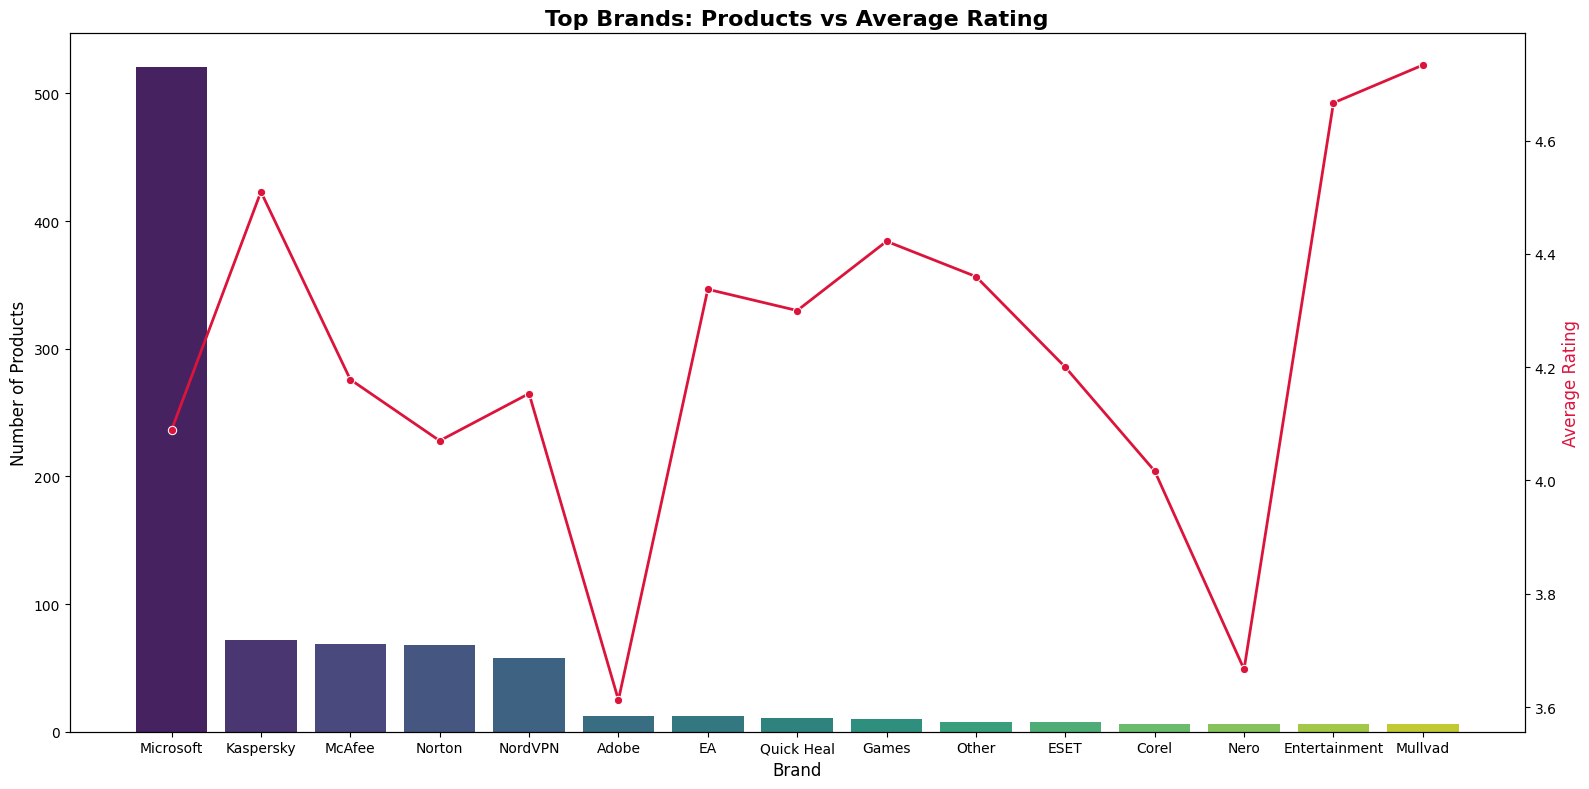

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# ניקח את 15 המותגים המובילים
top_brands = brand_stats.head(15).reset_index()

fig, ax1 = plt.subplots(figsize=(16,8))

# 🔹 גרף עמודות – צבעים לפי כמות מוצרים
sns.barplot(
    data=top_brands,
    x="brand",
    y="products",
    palette="viridis",   # סקאלה צבעונית
    ax=ax1
)
ax1.set_ylabel("Number of Products", fontsize=12, color="black")
ax1.set_xlabel("Brand", fontsize=12)
ax1.set_title("Top Brands: Products vs Average Rating", fontsize=16, weight="bold")

# 🔹 גרף קו – רייטינג ממוצע
ax2 = ax1.twinx()
sns.lineplot(
    data=top_brands,
    x="brand",
    y="avg_rating",
    color="crimson",
    marker="o",
    linewidth=2,
    ax=ax2
)
ax2.set_ylabel("Average Rating", fontsize=12, color="crimson")

# שיפור קריאות
plt.xticks(rotation=45, ha="right")
plt.subplots_adjust(bottom=0.2)
plt.tight_layout()
plt.show()


In [13]:
def group_brands(df, method="thematic", threshold=10, top_n=10):
    # 1. קיבוץ נושאי
    if method == "thematic":
        group_map = {
            "Security": ["Norton", "McAfee", "Kaspersky", "Avast", "Bitdefender", "ESET", "Panda", "Webroot", "Quick Heal"],
            "Office/Productivity": ["Microsoft", "Adobe", "Corel", "OfficeSuite", "Kingsoft"],
            "Creative/Audio/Video": ["CLIP Studio", "MAGIX", "Pinnacle Studio", "Audio Gear", "Spectrasonics", "Movavi", "Roland", "Yamaha", "Arturia", "Shure"],
            "Gaming/Entertainment": ["EA", "Square Enix", "Kadokawa", "Games", "Entertainment", "Hatsune Miku", "Evercade"],
            "Finance/Tax": ["TurboTax", "H&R Block", "Quicken", "Tax Software", "QuickSteuer", "WISO", "Lidl Steuer", "Yayoi"],
            "Utilities/Tools": ["CCleaner", "VMware", "Intel", "TP-Link", "Synology", "F-Secure"]
        }
        
        def map_group(brand):
            for group, brands in group_map.items():
                if brand in brands:
                    return group
            return "Other"
        
        df['brand_grouped'] = df['brand'].apply(map_group)
    
    # 2. לפי threshold
    elif method == "threshold":
        brand_counts = df['brand'].value_counts()
        small_brands = brand_counts[brand_counts < threshold].index
        df['brand_grouped'] = df['brand'].apply(lambda x: x if x not in small_brands else "Other Small Brands")
    
    # 3. לפי Top-N
    elif method == "top_n":
        brand_counts = df['brand'].value_counts()
        top_brands = brand_counts.head(top_n).index
        df['brand_grouped'] = df['brand'].apply(lambda x: x if x in top_brands else "Other")
    
    return df


In [14]:
# קיבוץ נושאי
df = group_brands(df, method="thematic")

# לפי threshold (<10 → Other Small Brands)
df = group_brands(df, method="threshold", threshold=10)

# לפי Top-N (10 הגדולים + Other)
df = group_brands(df, method="top_n", top_n=10)

# הצגת התוצאות
print(df['brand_grouped'].value_counts())


brand_grouped
Microsoft     521
Other         158
Kaspersky      72
McAfee         69
Norton         68
NordVPN        58
EA             12
Adobe          12
Quick Heal     11
Games          10
ESET            8
Name: count, dtype: int64


C:\Users\USER\AppData\Local\Temp\ipykernel_5168\141401626.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


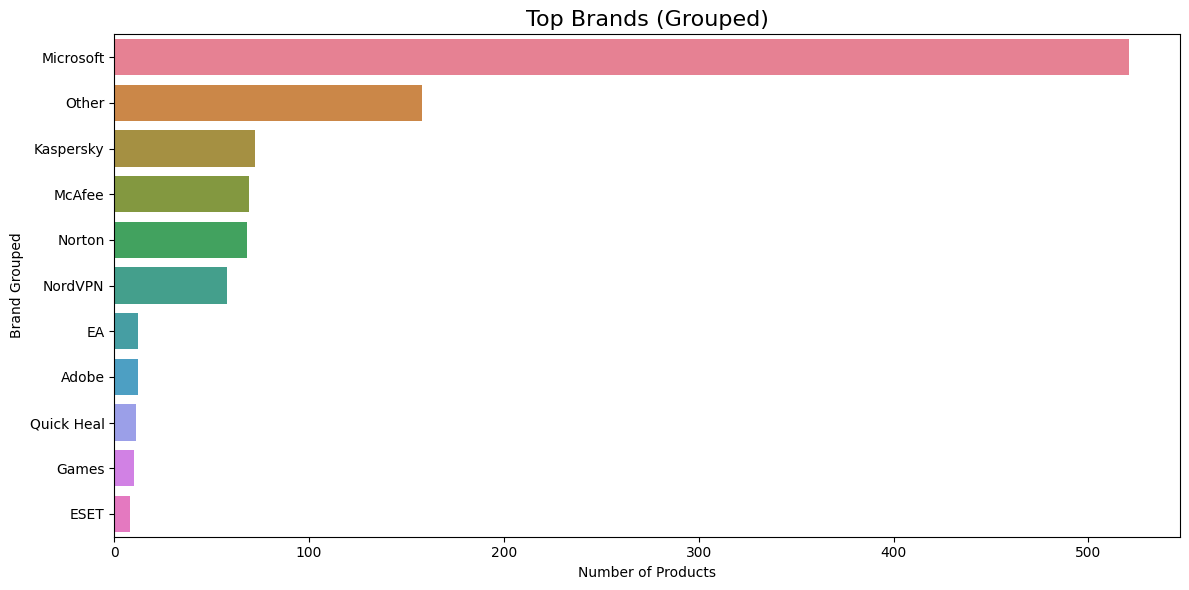

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

brand_counts = df['brand_grouped'].value_counts()

# 🔹 Bar Plot
plt.figure(figsize=(12,6))
sns.barplot(
    x=brand_counts.values,
    y=brand_counts.index,
    palette="husl"
)
plt.title("Top Brands (Grouped)", fontsize=16)
plt.xlabel("Number of Products")
plt.ylabel("Brand Grouped")
plt.tight_layout()
plt.show()


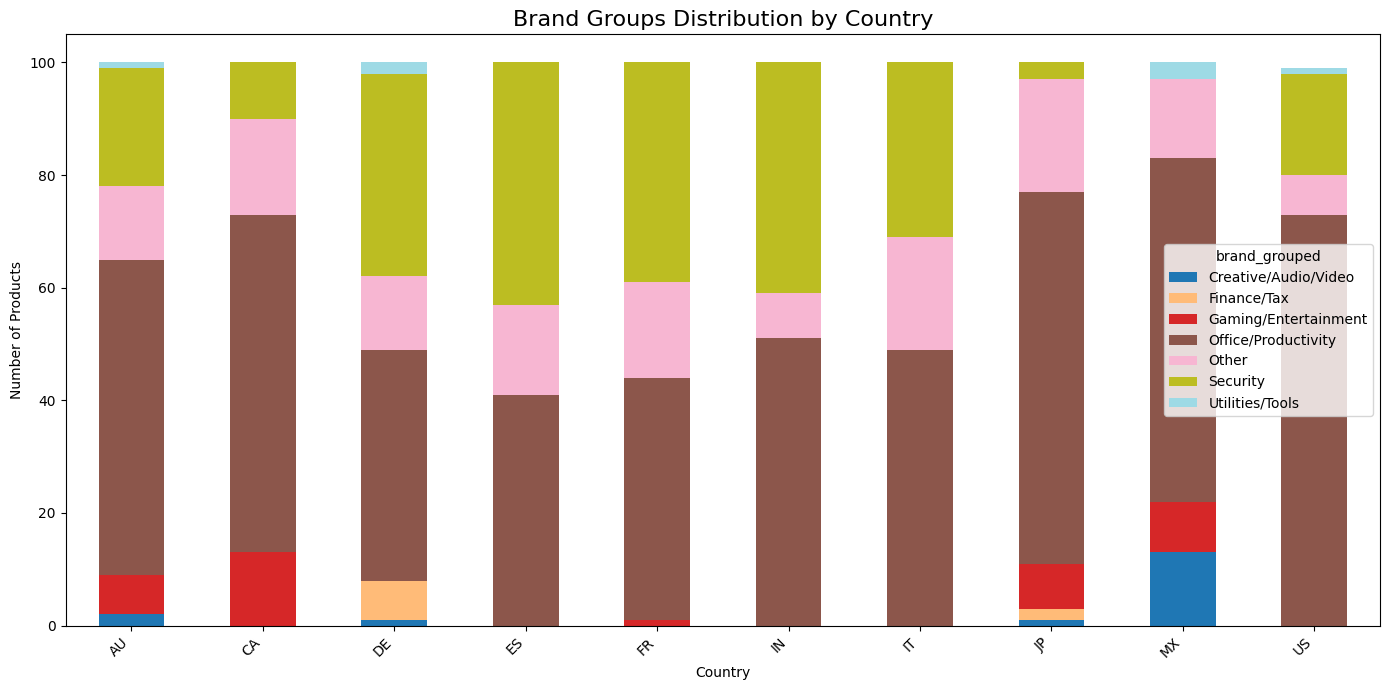

In [16]:
# קודם כל עושים קיבוץ נושאי
df = group_brands(df, method="thematic")

# קיבוץ לפי מדינה × תחום
brand_country_grouped = df.groupby(['country','brand_grouped']).size().unstack(fill_value=0)

# גרף עמודות מוערמות
brand_country_grouped.plot(
    kind="bar",
    stacked=True,
    figsize=(14,7),
    colormap="tab20"
)

plt.title("Brand Groups Distribution by Country", fontsize=16)
plt.xlabel("Country")
plt.ylabel("Number of Products")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [17]:
plt.figure(figsize=(14,8))
sns.heatmap(
    brand_country,
    cmap="YlGnBu",
    linewidths=0.5
)
plt.title("Brand vs Country Heatmap", fontsize=16)
plt.xlabel("Brand")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


NameError: name 'brand_country' is not defined

<Figure size 1400x800 with 0 Axes>

C:\Users\USER\AppData\Local\Temp\ipykernel_6888\3689283879.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df['brand'].isin(top_brands)], x='brand', y='clean_price', palette="husl")


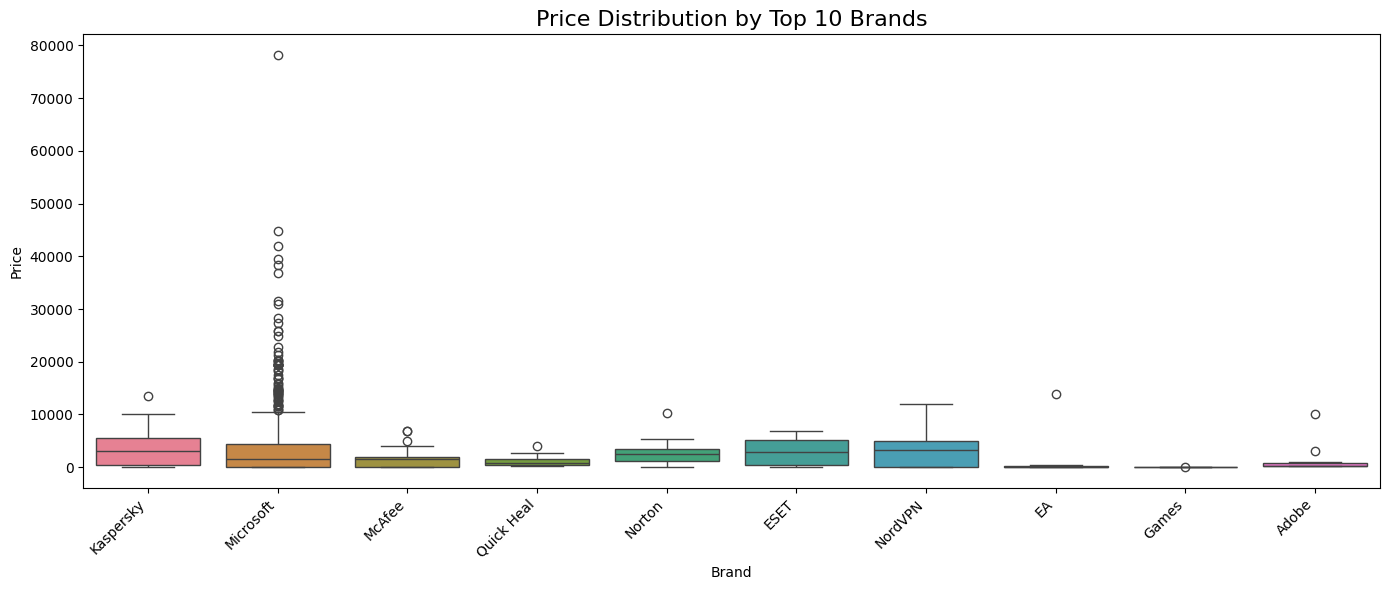

In [ ]:
top_brands = df['brand'].value_counts().head(10).index
plt.figure(figsize=(14,6))
sns.boxplot(data=df[df['brand'].isin(top_brands)], x='brand', y='clean_price', palette="husl")
plt.title("Price Distribution by Top 10 Brands", fontsize=16)
plt.xlabel("Brand")
plt.ylabel("Price")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_6888\783186357.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='brand_grouped', y='clean_price', palette="Set2", cut=0)


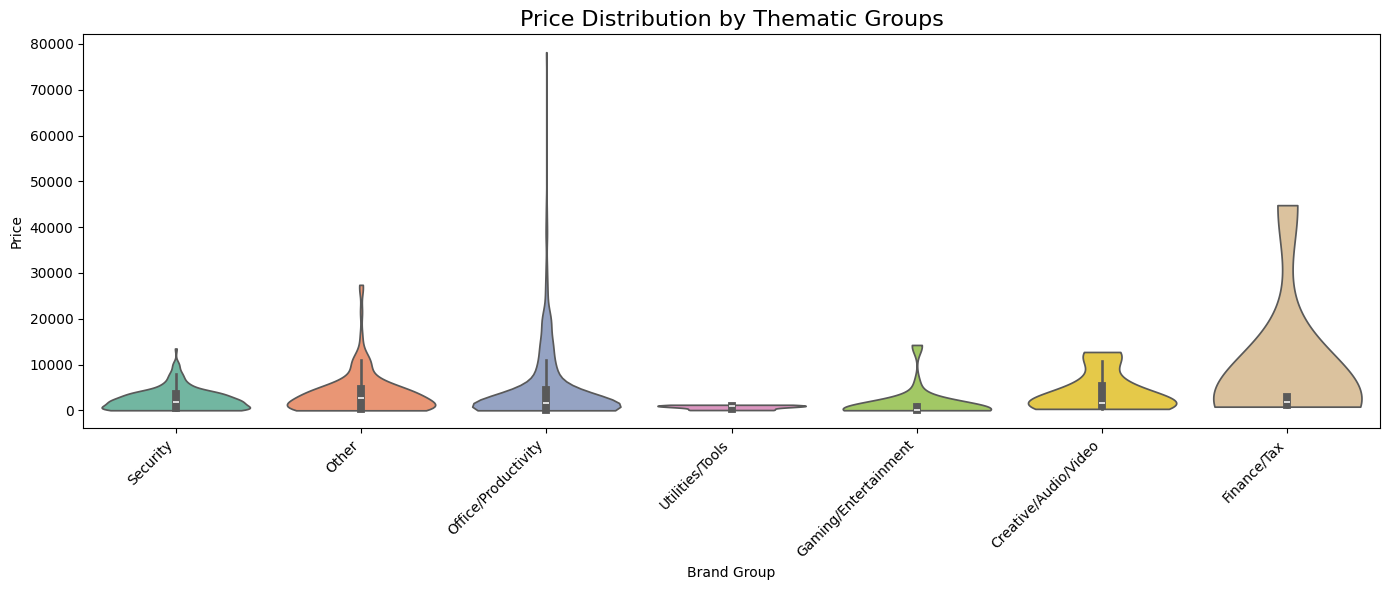

In [ ]:
df = group_brands(df, method="thematic")

plt.figure(figsize=(14,6))
sns.violinplot(data=df, x='brand_grouped', y='clean_price', palette="Set2", cut=0)
plt.title("Price Distribution by Thematic Groups", fontsize=16)
plt.xlabel("Brand Group")
plt.ylabel("Price")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


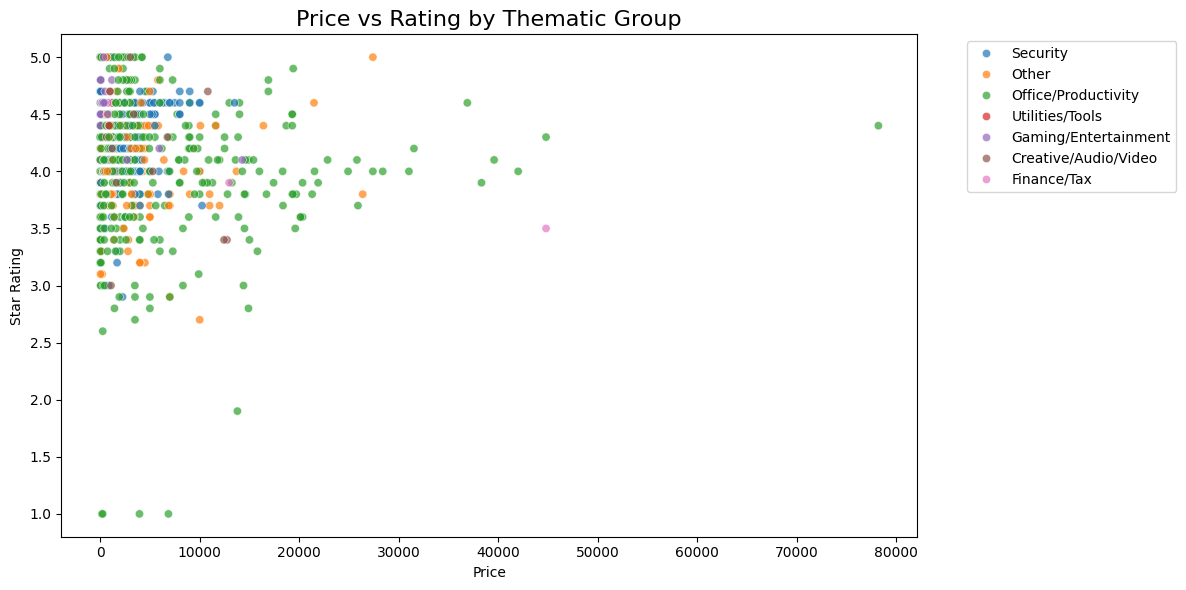

In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(
    data=df,
    x='clean_price',
    y='product_star_rating',
    hue='brand_grouped',
    alpha=0.7,
    palette="tab10"
)
plt.title("Price vs Rating by Thematic Group", fontsize=16)
plt.xlabel("Price")
plt.ylabel("Star Rating")
plt.legend(bbox_to_anchor=(1.05,1), loc="upper left")
plt.tight_layout()
plt.show()
